In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim.downloader as api
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from itertools import combinations
from collections import Counter
from nltk.probability import FreqDist
from nltk.util import ngrams
import re
#from transformers import pipeline, set_seed
#from google.colab import files
#uploaded = files.upload()

#### Neural Networks

#### Exercise 1

In [7]:
class SingleLayerNN:
    def __init__(self, input_dim):
        self.weights = np.random.rand(input_dim) # initialize weights randomly
        self.bias = np.random.rand(1)
        
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        return 1/(1+np.exp(-z)) # activation function to make predictions
    
    def binary_cross_entropy(self, y, y_pred): # loss function to determine best learning rate
        return - (y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    
    def train(self, X, y, epochs, learning_rate=0.1):
        total_loss = [] # loss for all data points and epochs
        for epoch in range(epochs):
            total_loss_epoch = 0.0 # total loss of one epoche 
            for i in range(len(X)):  # iterate over rows (n samples)
                y_pred = self.predict(X[i]) # predict y
                loss = self.binary_cross_entropy(y[i],y_pred) # loss per data point
                total_loss_epoch += loss 
                delta_w = learning_rate * (y[i] - y_pred) * y_pred * (1 - y_pred) * X[i] # compute delta w
                delta_b = learning_rate * (y[i] - y_pred) * y_pred * (1 - y_pred) # compute delta b
                self.weights += delta_w # update weights
                self.bias += delta_b # update bias
            total_loss_epoch = total_loss_epoch/len(X) # get average loss per epoche
            total_loss.append(total_loss_epoch) # append to list of losses of all epochs
        return sum(total_loss)/epochs # return average loss over all epochs and data points
                  

In [5]:
# Generate synthetic data for two classes
n_samples = 100
features_class_0 = np.random.randn(n_samples, 2) + [2, -2] # Class 0
features_class_1 = np.random.randn(n_samples, 2) + [-2, 2] # Class 1

data = np.vstack((features_class_0, features_class_1)) # concatenate dataset
labels = np.hstack((np.zeros(n_samples),np.ones(n_samples))) # generate label data

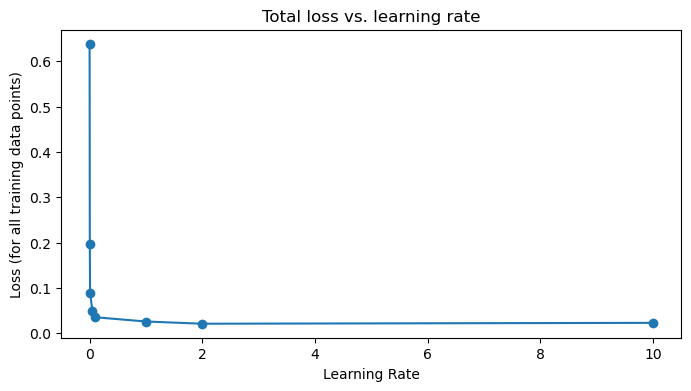

In [33]:
# choose learning rate
model = SingleLayerNN(data.shape[1]) # initiate model
total_loss = []

learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 1,2,10]

for learning_rate in learning_rates:
    loss = model.train(data, labels, 10, learning_rate=learning_rate)
    total_loss.append(loss)

plt.figure(figsize=(8, 4))
plt.plot(learning_rates, total_loss, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Loss (for all training data points)')
plt.title('Total loss vs. learning rate')
plt.show()

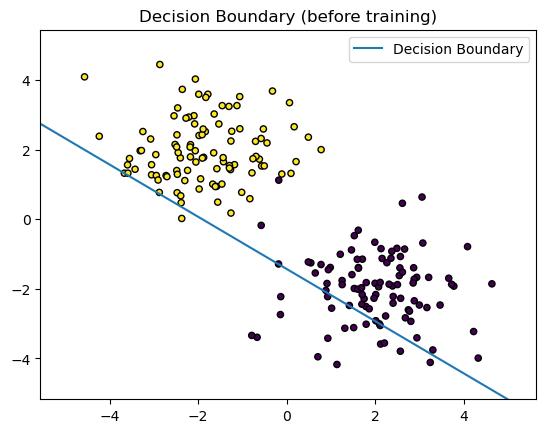

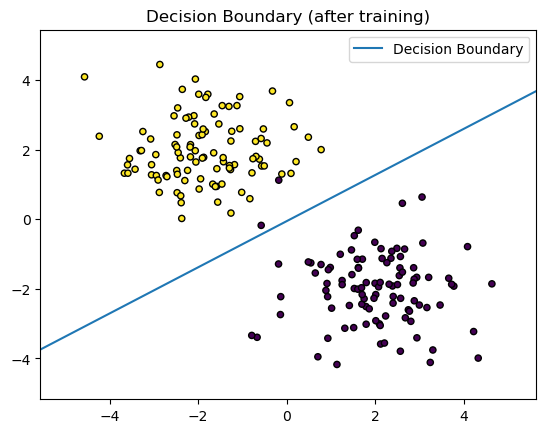

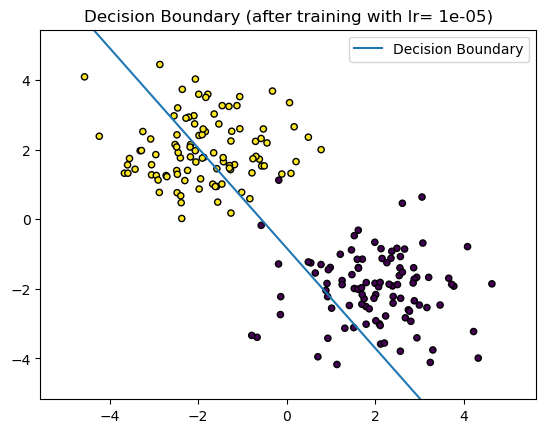

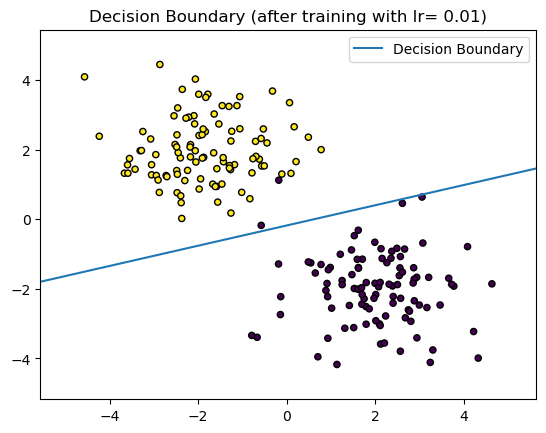

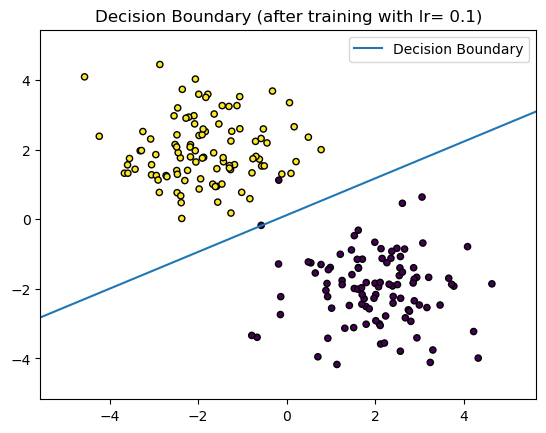

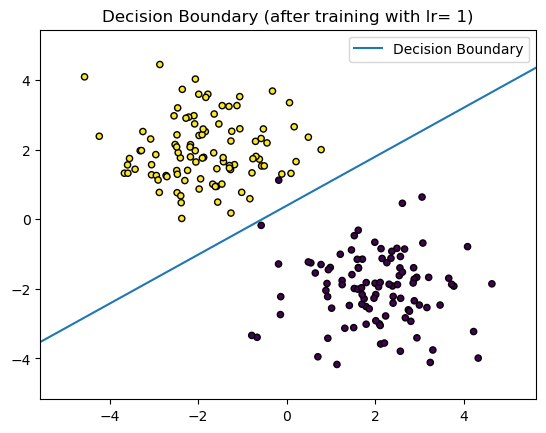

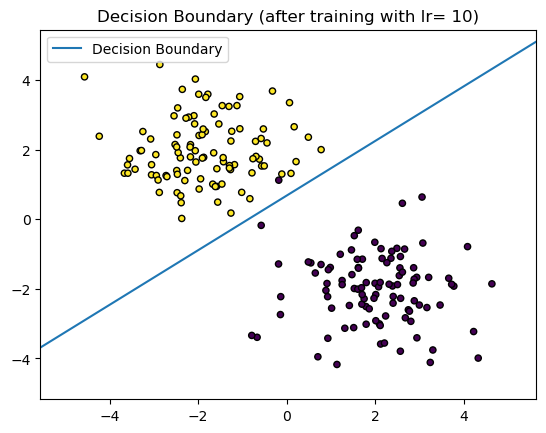

In [43]:
def plot_decision_boundary(nn, X, y, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x_values = np.linspace(x_min, x_max, 300)
    
    y_values = (-nn.weights[0]/ nn.weights[1]) * x_values - (nn.bias/ nn.weights[1]) # using formula on assignment pdf
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor="k")
    plt.plot(x_values, y_values, label="Decision Boundary")
    plt.xlim(x_min, x_max)
    plt.ylim(X[:, 1].min() - 1, X[:, 1].max() + 1)
    plt.title(title)
    plt.legend()
    plt.show()

    
model = SingleLayerNN(data.shape[1]) # initiate model

# decision boundary before training with randomly initialized weights and biases
plot_decision_boundary(model, data, labels, title="Decision Boundary (before training)")

model.train(data,labels, 10)
plot_decision_boundary(model, data, labels, title="Decision Boundary (after training)")

learning_rates_to_plot = [0.00001,0.01,0.1, 1,10]


for i,lr in enumerate(learning_rates_to_plot):
    model = SingleLayerNN(data.shape[1])# instantiate new model
    model.train(data,labels, 10, lr)
    plot_decision_boundary(model, data, labels, title=f"Decision Boundary (after training with lr= {lr})")
    
plt.show()

#### Discussion of implementation and results:

I implemented a single layer neural network with just one neuron, with random initialized weights and bias. I used the sigmoid function as an activation function to make predictions and binary cross entropy as a loss function. While training, the weights and bias of the model get updated by using gradient descent to minimize the binary cross entropy loss. The training function returns the average loss for all epochs and data points which is crucial to estimate the performance of the model (and used as an approach to determine the learning rate). A generated synthetic data set with two labels is then created and passed as input training data to an newly instantiated model. The decision boundary between two classes is then plotted. We can observe that the decision boundary before training (with random initiated weights and bias) does not effectively separate the data points. After training, the model updated its weights and biases in such a way that the decision boundary now better separates the data points.

#### Discussion of the impact of learning rate and the behavior of perceptron on non-linearly separable datasets:

- How I chose the learning rate:

Since the choice of the learning rate is not trivial and usually domain and architecture specific, I looked up what learning rates generally are used with a perceptron. Scikit-learn's perceptron class takes a default value of 0.1 $^{1}$ and also other approaches use this learning rate for a perceptron $^{2}$. I then tested the model with learning rates ranging from 0.001 to 3, so around 0.1, and added a loss function to the SingleLayerNN (binary cross entropy because we are dealing with a binary classification here). I then plotted the average total loss over all data points and epochs against the learning rate. In the plot above we can see that generally the loss is smaller the larger the learning rate. After a learning rate of 0.1 however, the loss does not decrease significantly anymore. Because of this observation, I chose a learning rate of 0.1, consistent with other approaches mentioned above. 

Another approach was to plot the decision boundaries of multiple different learning rates after training. This was done above. For demonstration, I chose a very small learning rate of 0.00001 ranging to a large learning rate of 10. We can see that the decision boundary does not separate the two classes sufficiently for a learning rate of 0.00001, but does so already for a learning rate of 0.01. After 0.1, the number of correctly captured data points does not change anymore, the line however moves closer to the yellow class. The differences however are very small. This method however comes with caveats because every instantiation of the model leads to different initial random weights.

We could also tell the algorithm when a minimum value for the difference between the weights/bias and the updated weights/bias is met. Like this, we could choose the learning rate that lead fastest to convergence.
IMPACT LEARNING RATE
- What happens if the dataset is not linearly separable? How does the NN behave, and why? What can we do to mitigate this issue?

If the dataset is not linearly separable, we face two main problems: convergence related issues and the problem of overfitting. The algorithm might not convergence at all or converge to a local minima. It could also overfit on the data, resulting in poor performance on not seen data. 

To mitigate these issues we could either increase the complexity of the network by adding layers or trying out different architectures. We could also generate more training data or make use of other non linear functions.

$^{1}$ https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/, retrieved Apr 2, 2024.

$^{2}$ https://towardsdatascience.com/an-introduction-to-perceptron-algorithm-40f2ab4e2099, retrieved Apr 2, 2024.

#### Backpropagation

#### Exercise 2

#### Natural Language Processing

#### Exercise 3
#### 1. Exploring Word Embeddings

In [3]:
# Download pre - trained GloVe word vectors
glove_vectors = api.load("glove-wiki-gigaword-100")

words = ["computer", "laptop", "queen", "king"]
for word in words:
    most_sim = glove_vectors.most_similar(word,topn =5)
    print(f"The most similar words to '{word}' are")
    for i, word in enumerate(most_sim):
        print(f"{i+1}. {word[0]}: {word[1]}")
    print()


The most similar words to 'computer' are
1. computers: 0.875198245048523
2. software: 0.8373122215270996
3. technology: 0.7642159461975098
4. pc: 0.7366448640823364
5. hardware: 0.7290391325950623

The most similar words to 'laptop' are
1. laptops: 0.8518659472465515
2. computers: 0.7559927105903625
3. phones: 0.7229112386703491
4. portable: 0.7157841324806213
5. desktop: 0.7085692286491394

The most similar words to 'queen' are
1. princess: 0.7947244644165039
2. king: 0.7507690191268921
3. elizabeth: 0.7355712056159973
4. royal: 0.7065026164054871
5. lady: 0.7044796943664551

The most similar words to 'king' are
1. prince: 0.7682328820228577
2. queen: 0.7507689595222473
3. son: 0.7020888328552246
4. brother: 0.6985775828361511
5. monarch: 0.6977890729904175



#### Explanation:



In [4]:
# conduct vector arithmetics

result1 = glove_vectors.most_similar(positive=["king", "woman"], negative=["man"], topn=5)
result2 = glove_vectors.most_similar(positive=["vehicle", "laptop"], negative=["computer"], topn=5)

print("The most similar words to the result of the vector operation 'king' - 'man' + 'woman' are:")
print()
for i, word in enumerate(result1):
    print(f"{i+1}. {word[0]}: {word[1]}")
print("\n")
print("The most similar words to the result of the vector operation 'vehicle' - 'computer' + 'laptop' are:")
print()
for i, word in enumerate(result2):
    print(f"{i+1}. {word[0]}: {word[1]}")

The most similar words to the result of the vector operation 'king' - 'man' + 'woman' are:

1. queen: 0.7698541283607483
2. monarch: 0.6843380928039551
3. throne: 0.6755736470222473
4. daughter: 0.6594555974006653
5. princess: 0.6520534157752991


The most similar words to the result of the vector operation 'vehicle' - 'computer' + 'laptop' are:

1. suv: 0.7571245431900024
2. minivan: 0.7312466502189636
3. parked: 0.7256272435188293
4. car: 0.7248832583427429
5. jeep: 0.7094311118125916


#### Explanation:




#### 2. Investigating Societal Biases:

In [5]:
# comparing similarities
professions = ["engineer", "nurse", "scientist"]
names = ["james", "emily", "mohammed", "ling", "juan", "fatima"]

# get combinations of the two lists
combinations_professions = list(combinations(professions, 2))
combinations_names = list(combinations(names, 2))

for combination in combinations_professions:
    vector1 = glove_vectors[combination[0]].reshape(1,-1)
    vector2 = glove_vectors[combination[1]].reshape(1,-1)
    sim = cosine_similarity(vector1, vector2)[0]
    print(f"Similarity between '{combination[0]}' and '{combination[1]}': {sim[0]}")
print()
for combination in combinations_names:
    vector1 = glove_vectors[combination[0]].reshape(1,-1)
    vector2 = glove_vectors[combination[1]].reshape(1,-1)
    sim = cosine_similarity(vector1, vector2)[0]
    print(f"Similarity between '{combination[0]}' and '{combination[1]}': {sim[0]}")

Similarity between 'engineer' and 'nurse': 0.43718859553337097
Similarity between 'engineer' and 'scientist': 0.6081478595733643
Similarity between 'nurse' and 'scientist': 0.3445221483707428

Similarity between 'james' and 'emily': 0.520024836063385
Similarity between 'james' and 'mohammed': 0.18603792786598206
Similarity between 'james' and 'ling': 0.18465358018875122
Similarity between 'james' and 'juan': 0.3696228861808777
Similarity between 'james' and 'fatima': 0.00801914744079113
Similarity between 'emily' and 'mohammed': 0.10634013265371323
Similarity between 'emily' and 'ling': 0.14373600482940674
Similarity between 'emily' and 'juan': 0.18589052557945251
Similarity between 'emily' and 'fatima': 0.28988373279571533
Similarity between 'mohammed' and 'ling': 0.136818528175354
Similarity between 'mohammed' and 'juan': 0.1896083652973175
Similarity between 'mohammed' and 'fatima': 0.41418784856796265
Similarity between 'ling' and 'juan': 0.21996815502643585
Similarity between 'lin

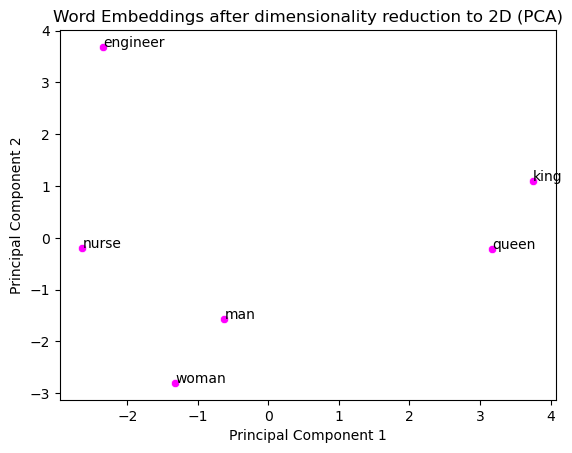

In [6]:
words = ["king", "queen", "man", "woman", "nurse", "engineer"]
word_vectors = [glove_vectors[word] for word in words]

# use PCA to reduce dimensions of word embeddings to 2D
pca = PCA(n_components=2)
vectors_reduced = pca.fit_transform(word_vectors)

# scatter plot
sns.scatterplot(x=vectors_reduced[:, 0], y=vectors_reduced[:, 1], color="magenta")

for i, word in enumerate(words):
    plt.annotate(word, (vectors_reduced[i, 0], vectors_reduced[i, 1]))

plt.title('Word Embeddings after dimensionality reduction to 2D (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### Discussion:

#### Exercise 4

In [7]:
# read in data
with open("text_corpus.txt", "r") as file:
    text = file.read()

# We split each word and punctuation into a separate token

tokenized_text = re.findall(r"[\w']+|[. ,!?;]" ,text.lower())

# We remove punctuation etc.
words = [word for word in tokenized_text if word.isalpha()] #DOES NOT KEEP THE ORDER
sentence_prefixes = ["It is not for me to" , "Sherlock Holmes is" , "The mystery of"]

In [24]:
# predict next word for a prefix based on the last word in the prefix given corpus frequency (word counts) 

def predict_next_word(ngram_model, tokenized_text, prefix, max_length=20):
    last_word = prefix.split()[-1]
    continuation = " "
    for i in range(max_length):
        next_word = ngram_model(tokenized_text,prefix+continuation)
        continuation += " " + next_word
        last_word = next_word
        
    print(prefix + "\033[1m" + continuation + "\033[0m")


# WAR WAHRSCHEINLICH ANDERS GEMEINT... next 20 words, wie eine Kette immer vom Ende weiter
# ALSO: N Gram as naive bayes?

In [29]:
# unigram model 
def unigram_model(tokenized_text,prefix): # predicts most frequent token
    unigram_fr = FreqDist(tokenized_text) # get frequencies of tokens
    most_frequent_unigram = unigram_fr.max() # get most frequent unigram
    return most_frequent_unigram

# bigram model
def bigram_model(tokenized_text, prefix):
    '''
    Bigram model that predicts the next word based on the previous one
    '''
    bigrams = list(ngrams(tokenized_text, 2)) # generate bigrams
    last_word = prefix.split()[-1] # get last word
    last_word_bigrams = [bigram for bigram in bigrams if bigram[0] == last_word] # filter out bigrams that do not have the last word of the prefix as first part
    if not last_word_bigrams:  # check if the filtered trigram list is empty
        print("No relevant bigrams found. Returning unigram model prediction.")
        return unigram_model(tokenized_text,prefix) # return prediction made by bigram model if there are no filtered trigrams
    bigram_fr = FreqDist(last_word_bigrams) # create frequency distribution over filtered bigrams
    most_frequent_bigram = bigram_fr.max() # get most frequent filtered bigram
    return most_frequent_bigram[1] # return predicted next word based on the last word of the prefix
    
# trigram model

def trigram_model(tokenized_text, prefix):
    trigrams = list(ngrams(tokenized_text, 3)) # generate trigrams
    last_two_words = prefix.split()[-2:] # get last two words
    last_word_trigrams = [trigram for trigram in trigrams if trigram[0] == last_two_words[0] and trigram[1] == last_two_words[1]] # filter out trigrams that do not have the last two words of the prefix as first part
    if not last_word_trigrams:  # check if the filtered trigram list is empty
        print(f"No relevant trigrams found for {last_two_words}. Returning bigram model prediction.")
        return bigram_model(tokenized_text,prefix) # return prediction made by bigram model if there are no filtered trigrams
    trigram_fr = FreqDist(last_word_trigrams) # create frequency distribution over filtered trigrams
    most_frequent_trigram = trigram_fr.max() # get most frequent filtered trigram
    return most_frequent_trigram[2] # return predicted next word based on the last two words of the prefix

models = [unigram_model, bigram_model, trigram_model]

for prefix in sentence_prefixes:
    for model in models:
        predict_next_word(model, words, prefix)
    print("--------------------")

It is not for me to  the the the the the the the the the the the the the the the the the the the the
It is not for me to  the door and i have been a little more than i have been a little more than i have been
It is not for me to  be a man who is in a few minutes with his head sunk upon his face was bent downward his
--------------------
Sherlock Holmes is  the the the the the the the the the the the the the the the the the the the the
Sherlock Holmes is  a little more than i have been a little more than i have been a little more than i have
No relevant trigrams found for ['Holmes', 'is']. Returning bigram model prediction.
Sherlock Holmes is  a very serious one to the other side of the house and there was a very serious one to the
--------------------
The mystery of  the the the the the the the the the the the the the the the the the the the the
The mystery of  the door and i have been a little more than i have been a little more than i have been
The mystery of  the house and there was

In [19]:
# use a pre-trained language model (gpt-2), to predict the continuation of sentence prefixes
generator = pipeline('text-generation', model='gpt2')
set_seed(42)

# TODO: predict the sentence given the sentence prefixes
for prefix in sentence_prefixes:
  results = generator(prefix, max_length=20, num_return_sequences=3, pad_token_id=generator.tokenizer.eos_token_id, truncation=True)
  for i,result in enumerate(results):
      print(f"{i+1}. {result['generated_text']}")
      print()

  print("----------------------")
  print()

1. It is not for me to speculate what that means. But whatever the final conclusion, I believe it

2. It is not for me to deny the fact that you and I live in real peace with our circumstances

3. It is not for me to ask you what the other part is for you, or how to approach

----------------------

1. Sherlock Holmes is being prosecuted in the United States on the "serious and aggravated computer fraud" charge

2. Sherlock Holmes is a man of few words.

He's been in over 600 police shootings

3. Sherlock Holmes is a regular on TNT's All In and features on a diverse roster of TV shows

----------------------

1. The mystery of this book?

The books are not necessarily a collection of the same titles and

2. The mystery of the existence of extraterrestrial species is not unknown. The most well known example is the

3. The mystery of the man's disappearance was first reported in the New York Times on November 12, and

----------------------



#### Discussion
- limitation of trigrams or generally n grams: the higher n the higher possibility that the n gram is not found in the corpus --> deal with missing trigrams, could return n-1-gram prediction.
- coherence --> not sure what is meant by that, trigram outperforms bigram and unigram for first prefix. Same result for third one and on second one, no relevant trigram found. UNKNOWN WORDS
- relevance -->
- creativity --> language model outperforms n-grams and the frequency based approach (predicting next word based on the last word in the prefix, essentially bigram approach).

first two approaches: only one word, language model predicts more words.

#### Computer Vision

#### Exercise 5

See additional .ipynb file.

#### References

ChatGPT Version 3.5 was used for error detection in code and as a writing tool to improve the writing of original content.